In [1]:
import sys
# not best practice, but makes it easier to import from subdirectory
sys.path.insert(0, './lib')

import experiment as exp
import plot
import predict

import numpy as np
import matplotlib.pyplot as plt

import os
import torch

%load_ext autoreload
%autoreload 2

device = torch.device('cuda:0')

Invoking __init__.py for NDNT.utils


# activity

In [2]:
# load experiment 8 (different activity reg values, no inhibition)
e7 = exp.load('reg_experiment_07', experiment_location='experiments', datadir='Mdata')
e7.trials

null_adjusted_LL num_filters  num_inh_percent    expt kernel_widths  \
0              True      16,8,8              0.0  expt04       21,11,5   
0              True      16,8,8              0.0  expt04       21,11,5   
0              True      16,8,8              0.0  expt04       21,11,5   
0              True      16,8,8              0.0  expt04       21,11,5   
0              True      16,8,8              0.0  expt04       21,11,5   
0              True      16,8,8              0.0  expt04       21,11,5   
0              True      16,8,8              0.0  expt04       21,11,5   
0              True      16,8,8              0.0  expt04       21,11,5   
0              True      16,8,8              0.0  expt04       21,11,5   
0              True      16,8,8              0.0  expt04       21,11,5   

  kernel_heights  copy_weights  freeze_weights  include_MUs  is_multiexp  \
0          3,3,3         False           False        False        False   
0          3,3,3         False           False        False        False   
0          3,3,3         False           False        False        False   
0          3,3,3         False           False        False        False   
0          3,3,3         False           False        False        False   
0          3,3,3         False           False        False        False   
0          3,3,3         False           False        False        False   
0          3,3,3         False           False        False        False   
0          3,3,3         False           False        False        False   
0          3,3,3         False           False        False        False   

   batch_size       modelstr      activity            name  \
0        6000  cnim_scaffold  0.000000e+00  cnim_scaffold0   
0        6000  cnim_scaffold  1.000000e+00  cnim_scaffold1   
0        6000  cnim_scaffold  5.000000e-01  cnim_scaffold2   
0        6000  cnim_scaffold  1.000000e-01  cnim_scaffold3   
0        6000  cnim_scaffold  1.000000e-02  cnim_scaffold4   
0        6000  cnim_scaffold  1.000000e-03  cnim_scaffold5   
0        6000  cnim_scaffold  1.000000e-04  cnim_scaffold6   
0        6000  cnim_scaffold  1.000000e-05  cnim_scaffold7   
0        6000  cnim_scaffold  1.000000e-06  cnim_scaffold8   
0        6000  cnim_scaffold  1.000000e-07  cnim_scaffold9   

                                         trial  mean_LLs  
0  <experiment.Trial object at 0x7f518b90ea30>  0.475560  
0  <experiment.Trial object at 0x7f518091ac70>  0.286034  
0  <experiment.Trial object at 0x7f518084cd90>  0.336320  
0  <experiment.Trial object at 0x7f51807fefd0>  0.413781  
0  <experiment.Trial object at 0x7f51808e5c10>  0.463517  
0  <experiment.Trial object at 0x7f5180913e50>  0.451843  
0  <experiment.Trial object at 0x7f5180935520>  0.465908  
0  <experiment.Trial object at 0x7f51809d6f70>  0.476332  
0  <experiment.Trial object at 0x7f51809d67f0>  0.473080  
0  <experiment.Trial object at 0x7f5180913190>  0.482536

In [6]:
import copy
def entropy(x):
    # flatten x
    x_flat = np.squeeze(copy.deepcopy(x))
    # normalize x
    x_normalized = x/np.sum(x_flat)
    # replace the zeros with ones before taking the log2
    x_normalized[x_normalized==0] = 1
    return -np.sum(x_normalized*np.log2(x_normalized))

# activity over 50 stimuli across reg vals

lazy loading dataset
Loading ['expt04']
Loading expt04
  Time embedding...
  Done.
prev_output shape torch.Size([50, 360]) ni 0 NetworkType.scaffold li 0
prev_output shape torch.Size([50, 576]) ni 0 NetworkType.scaffold li 1
prev_output shape torch.Size([50, 288]) ni 0 NetworkType.scaffold li 2


KeyboardInterrupt: 

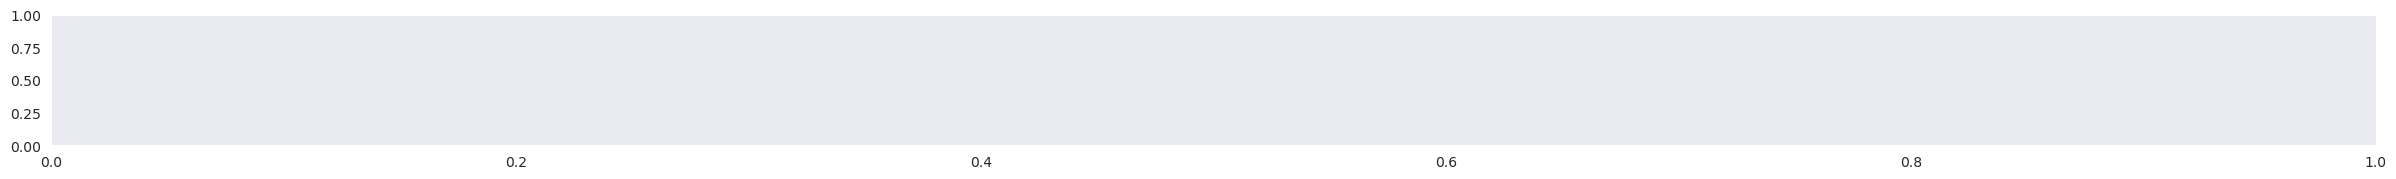

In [4]:
# compare the activity of the subunits and neurons for different reg values
# (concatenate the weights from all the layers)
# plot the weights for each trial
fig = plt.figure(figsize=(30,20))
# turn gridlines off
for i in range(len(e7.trials)):
    trial = e7.trials_where(name='cnim_scaffold'+str(i))[0]
    ax = fig.add_subplot(len(e7.trials),1,i+1)
    ax.grid(False) # turn gridlines off
    model = trial.model
    results = predict.predict(model,
                              dataset=trial.dataset[1000:1050],
                              network_names_to_use=['core'])
    # only plot the first layer
    im = [np.squeeze(results.outputs[i]['core'][0]) for i in range(50)]
    im_entropy = entropy(im)
    imax = np.max(im)
    imin = -imax
    ax.imshow(im, cmap='gray', vmin=imin, vmax=imax)

    ax.set_title('activity regularization = '+str(trial.trial_params['activity']) + ' entropy = '+str(im_entropy), fontsize=20)

plt.show()

# activity=1.0

In [3]:
trial_act10 = e7.trials_where(activity=1.0)[0]
model_act10 = trial_act10.model
results_act10 = predict.predict(model_act10,
                          dataset=trial_act10.dataset[0:1000],
                          network_names_to_use=['core'])

lazy loading dataset
Loading ['expt04']
Loading expt04
  Time embedding...
  Done.
prev_output shape torch.Size([1000, 360]) ni 0 NetworkType.scaffold li 0
prev_output shape torch.Size([1000, 576]) ni 0 NetworkType.scaffold li 1
prev_output shape torch.Size([1000, 288]) ni 0 NetworkType.scaffold li 2


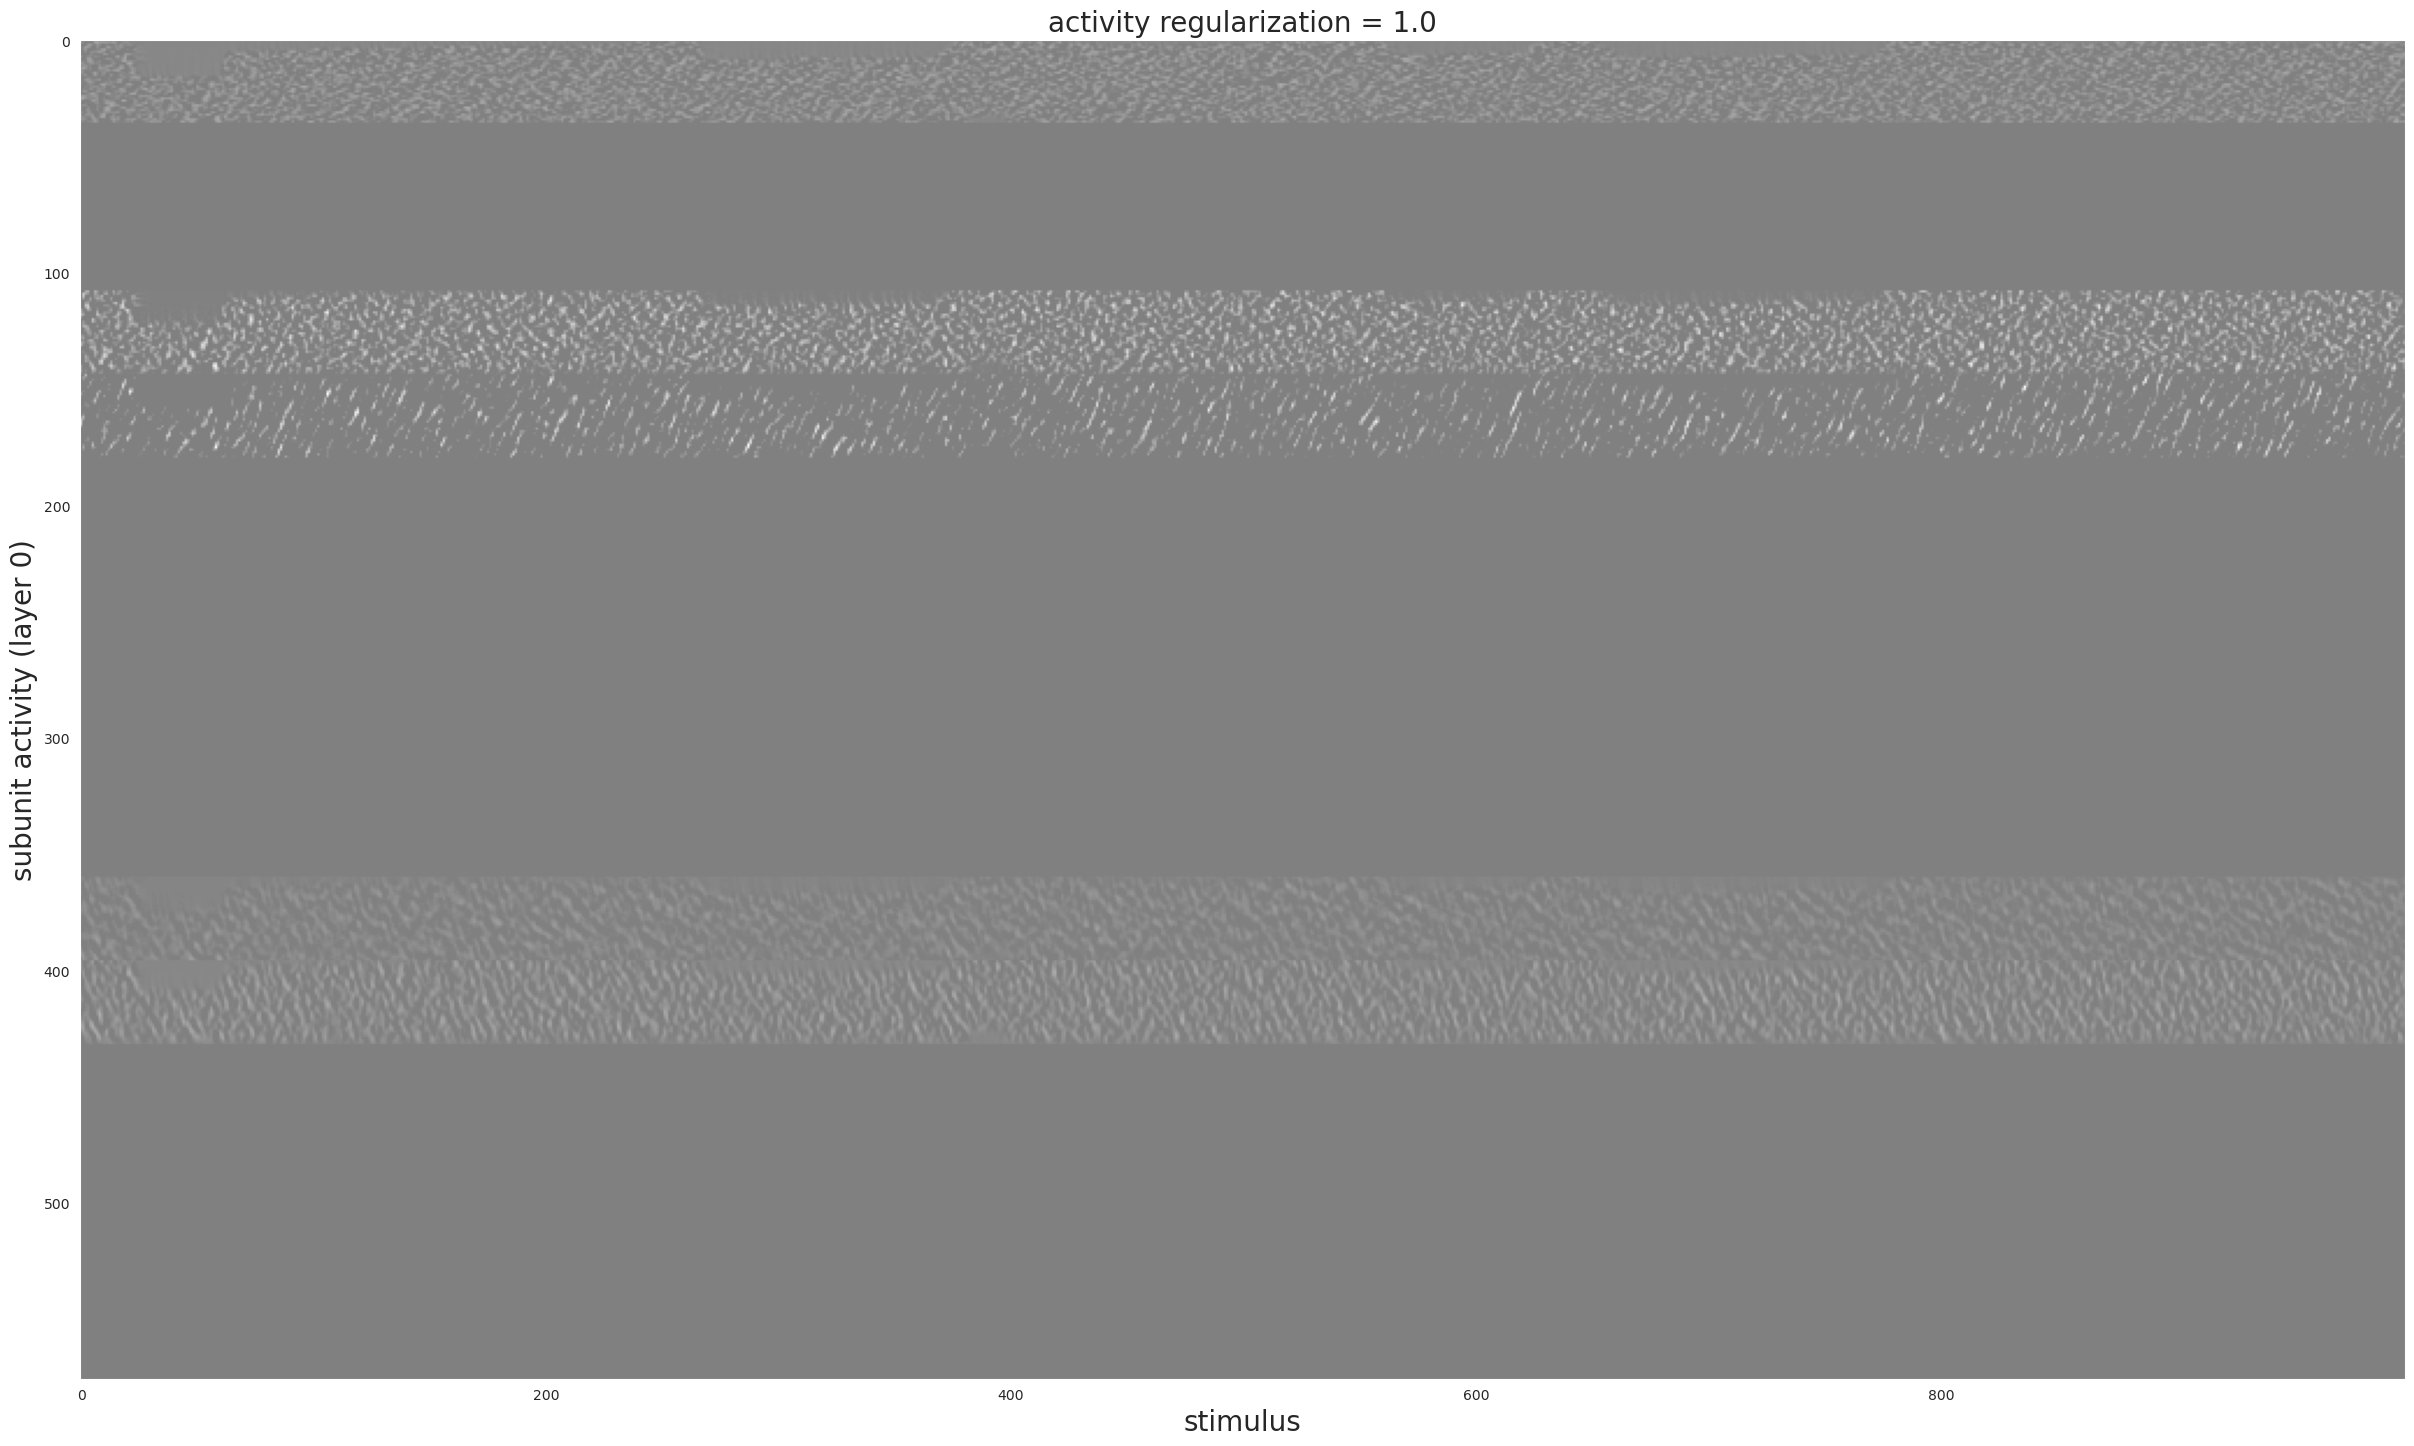

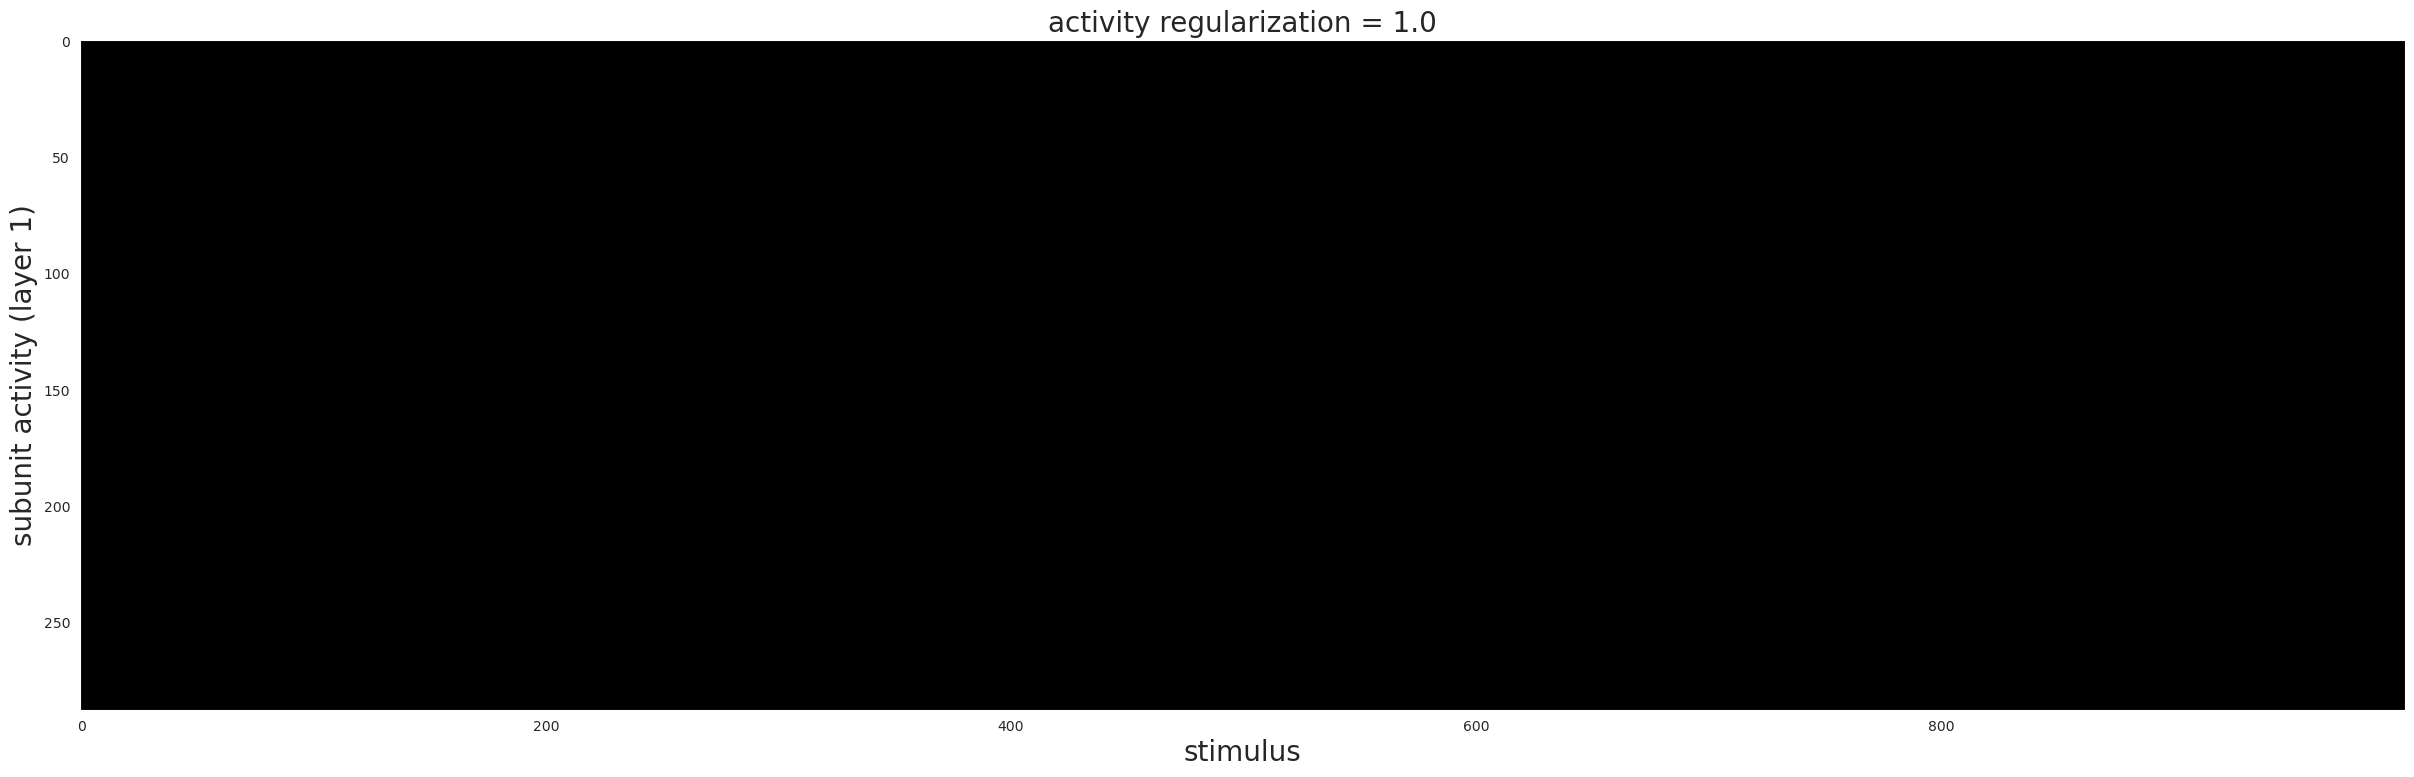

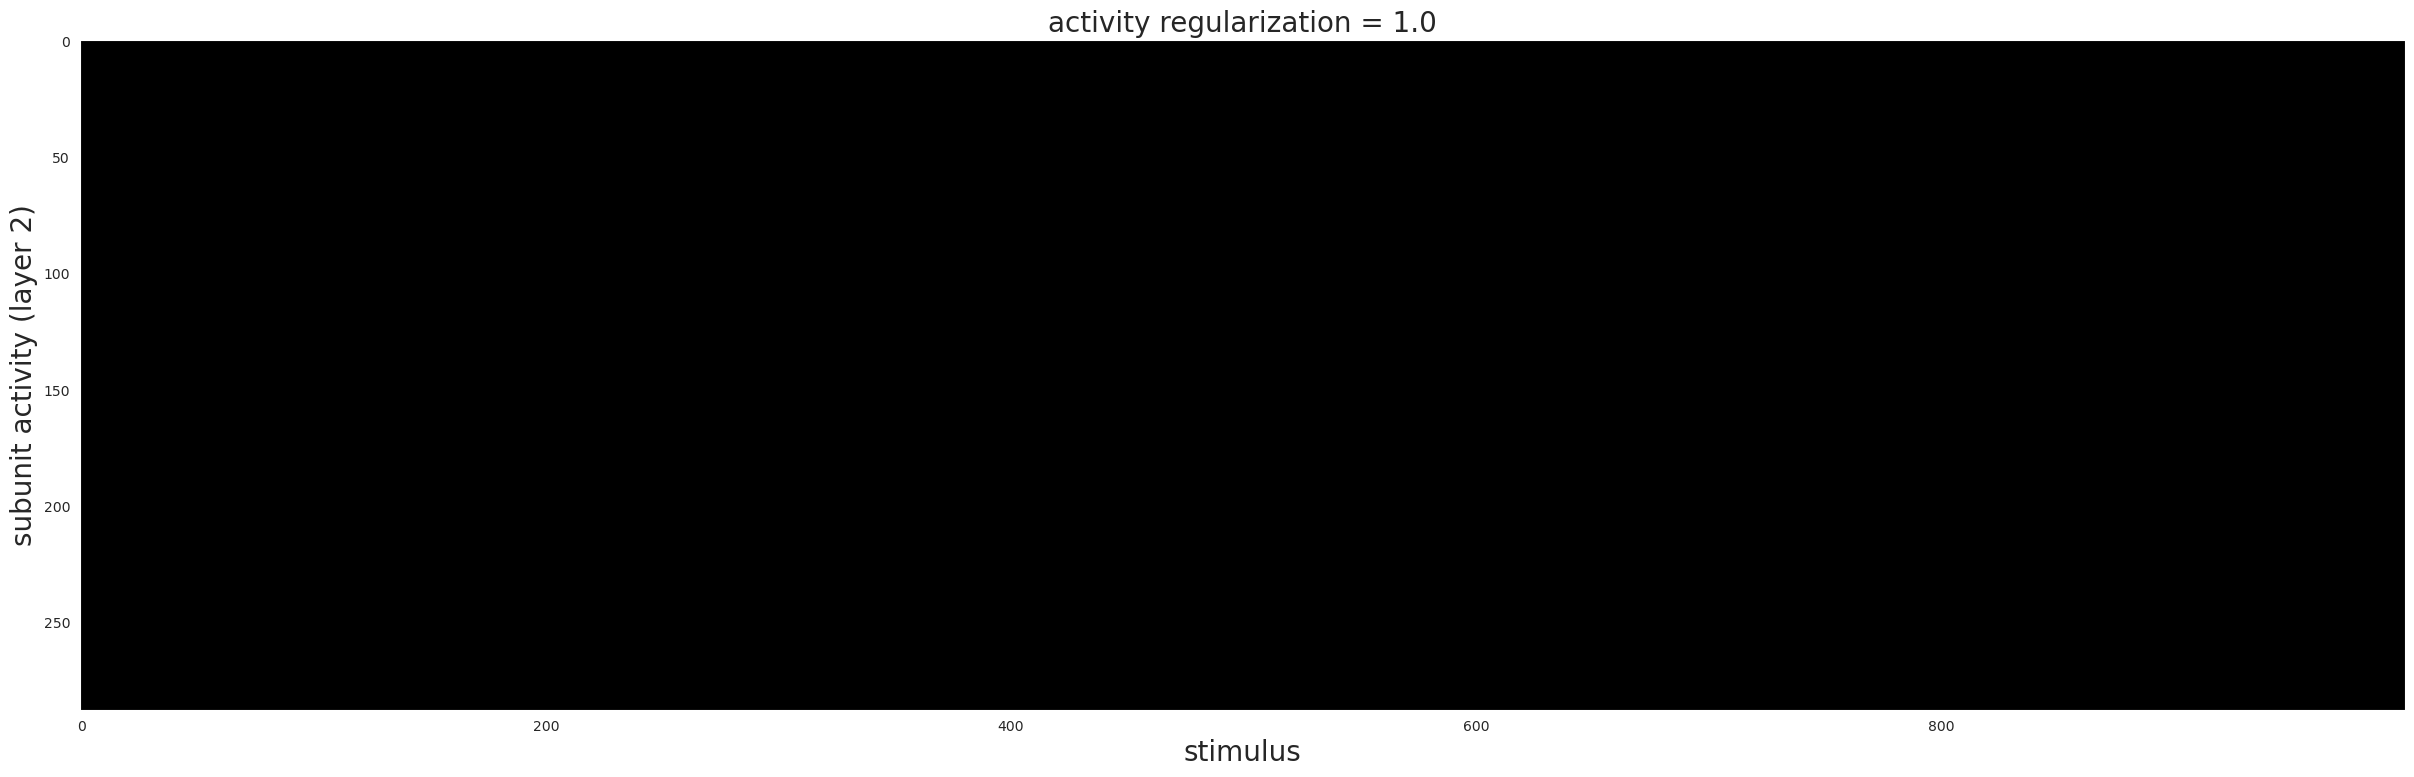

In [28]:
# only plot the first layer
for layer in range(3):
    fig = plt.figure(figsize=(30,20))
    plt.grid(False) # turn gridlines off
    im = np.array([np.squeeze(results_act10.outputs[i]['core'][layer]) for i in range(1000)])
    imax = np.max(im)
    imin = -imax
    plt.imshow(im.T, cmap='gray', vmin=imin, vmax=imax)
    plt.title('activity regularization = '+str(trial_act10.trial_params['activity']), fontsize=20)
    plt.xlabel('stimulus', fontsize=20)
    plt.ylabel('subunit activity (layer '+str(layer)+')', fontsize=20)
plt.show()

# activity=0.5

In [29]:
trial_act05 = e7.trials_where(activity=0.5)[0]
model_act05 = trial_act05.model
results_act05 = predict.predict(model_act05,
                                dataset=trial_act05.dataset[0:1000],
                                network_names_to_use=['core'])

lazy loading dataset
Loading ['expt04']
Loading expt04
  Time embedding...
  Done.
prev_output shape torch.Size([1000, 360]) ni 0 NetworkType.scaffold li 0
prev_output shape torch.Size([1000, 576]) ni 0 NetworkType.scaffold li 1
prev_output shape torch.Size([1000, 288]) ni 0 NetworkType.scaffold li 2


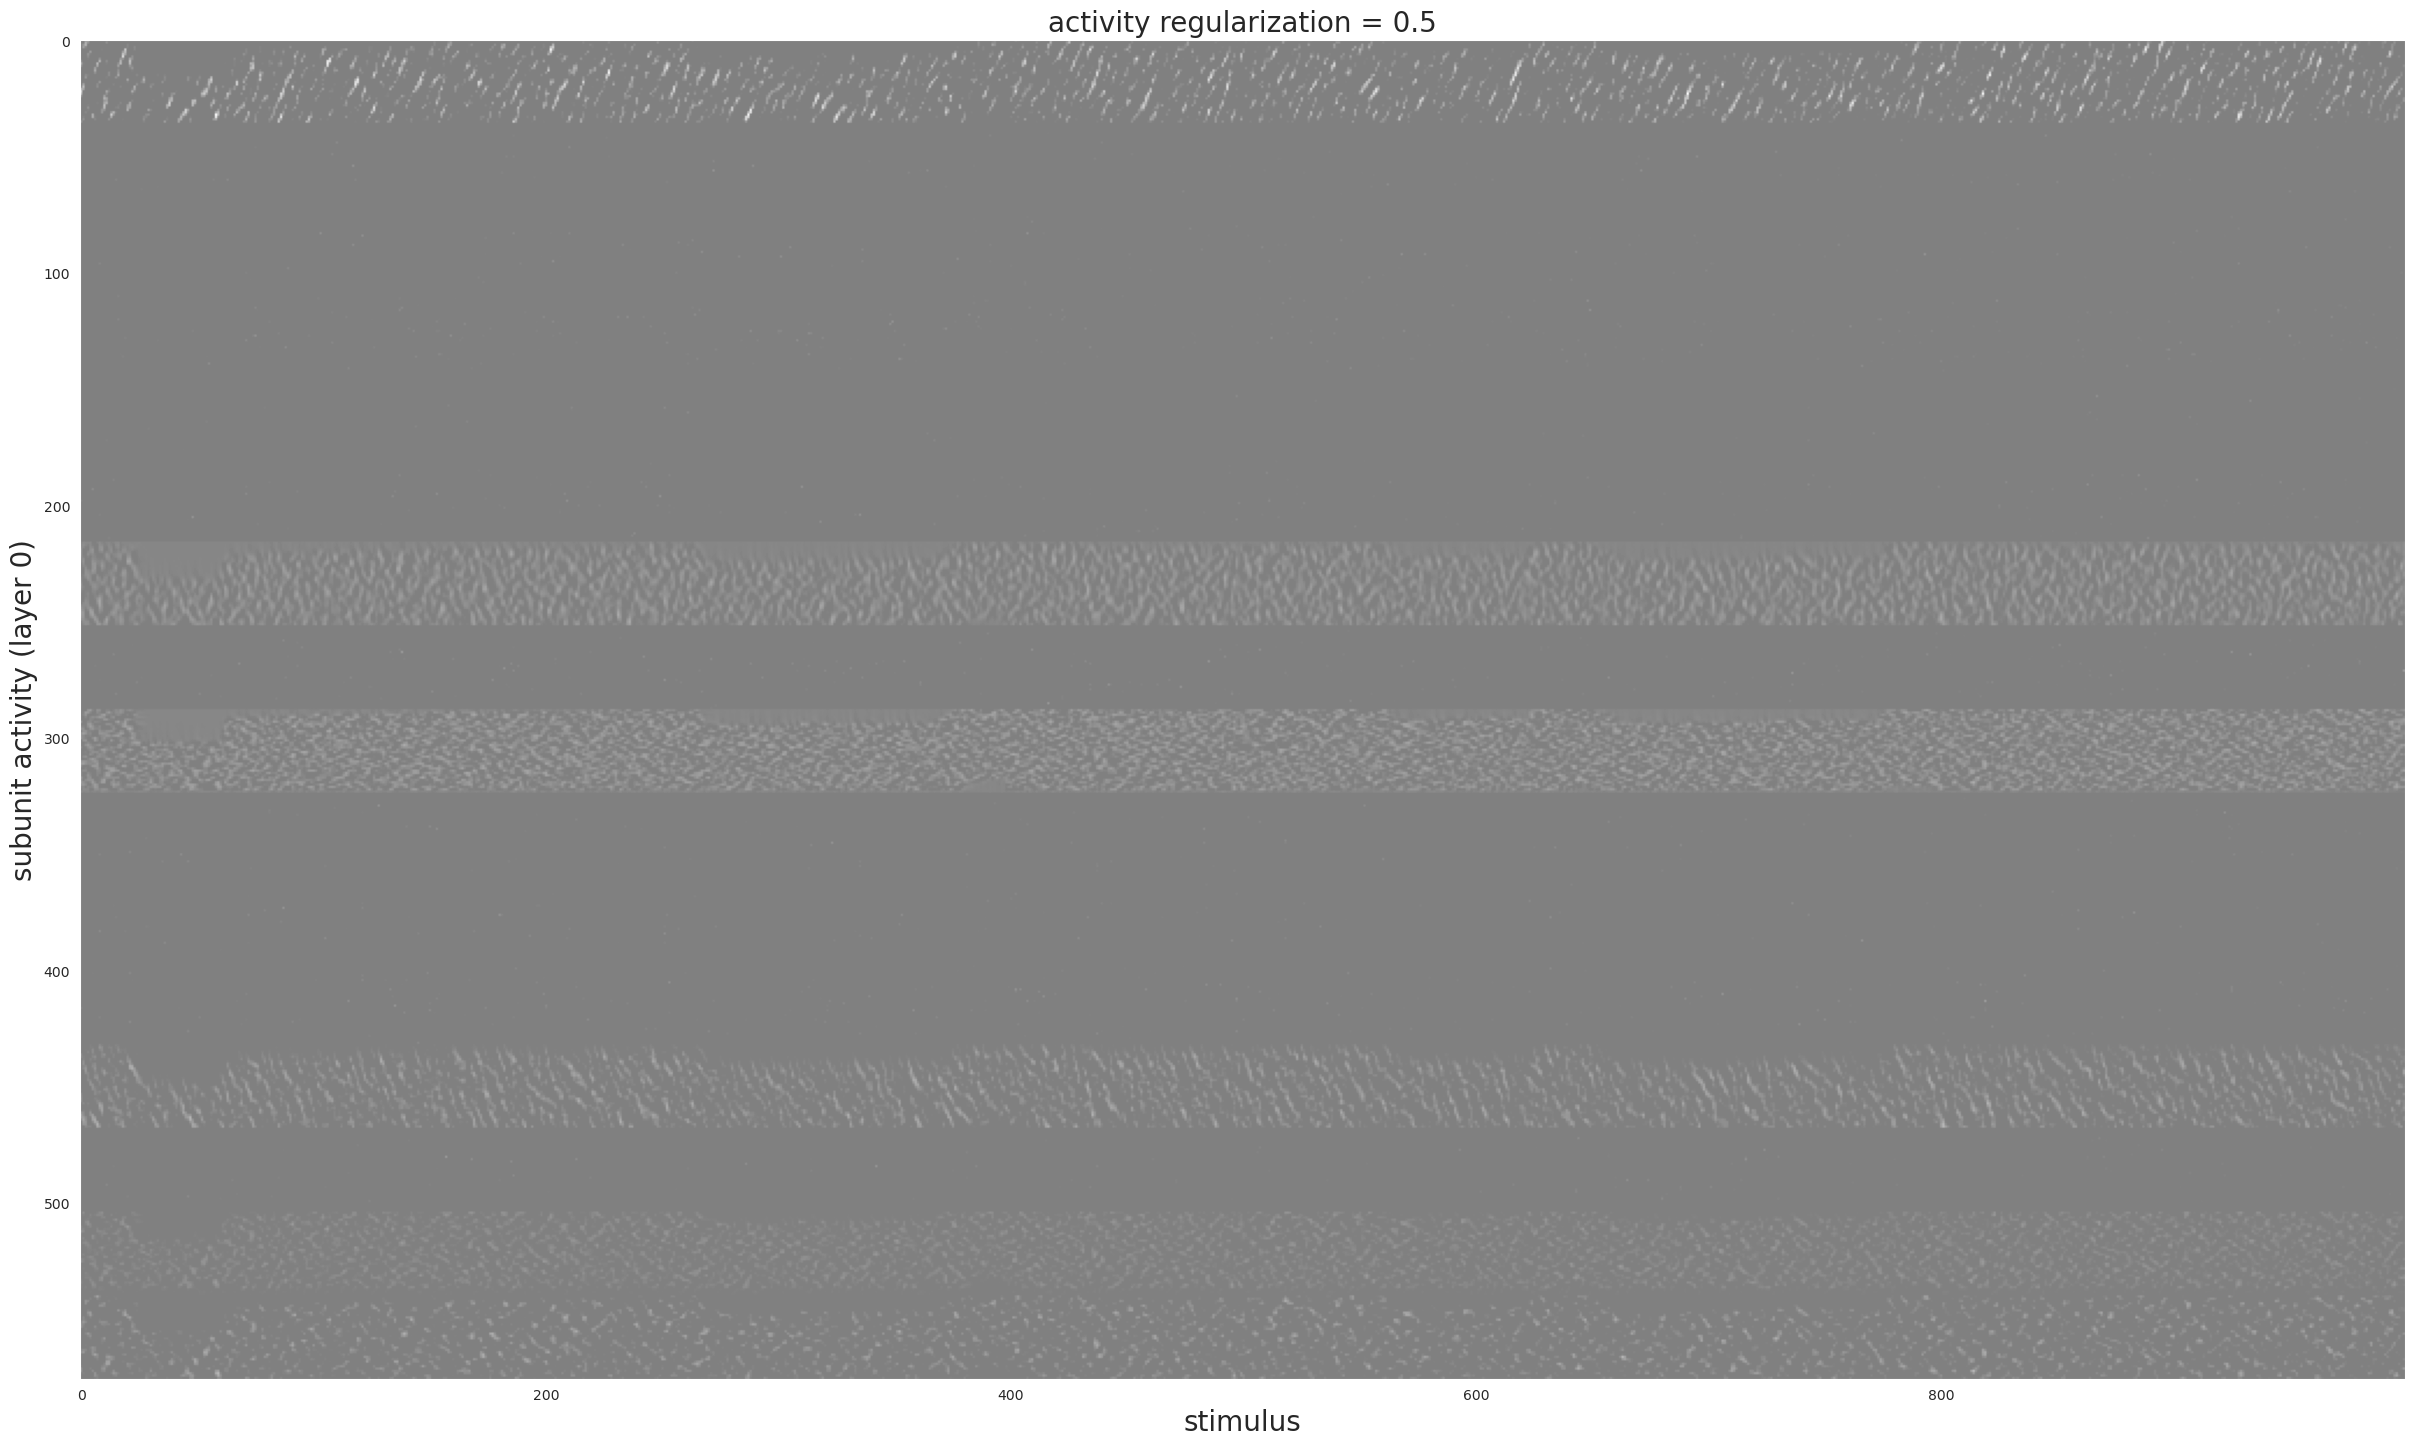

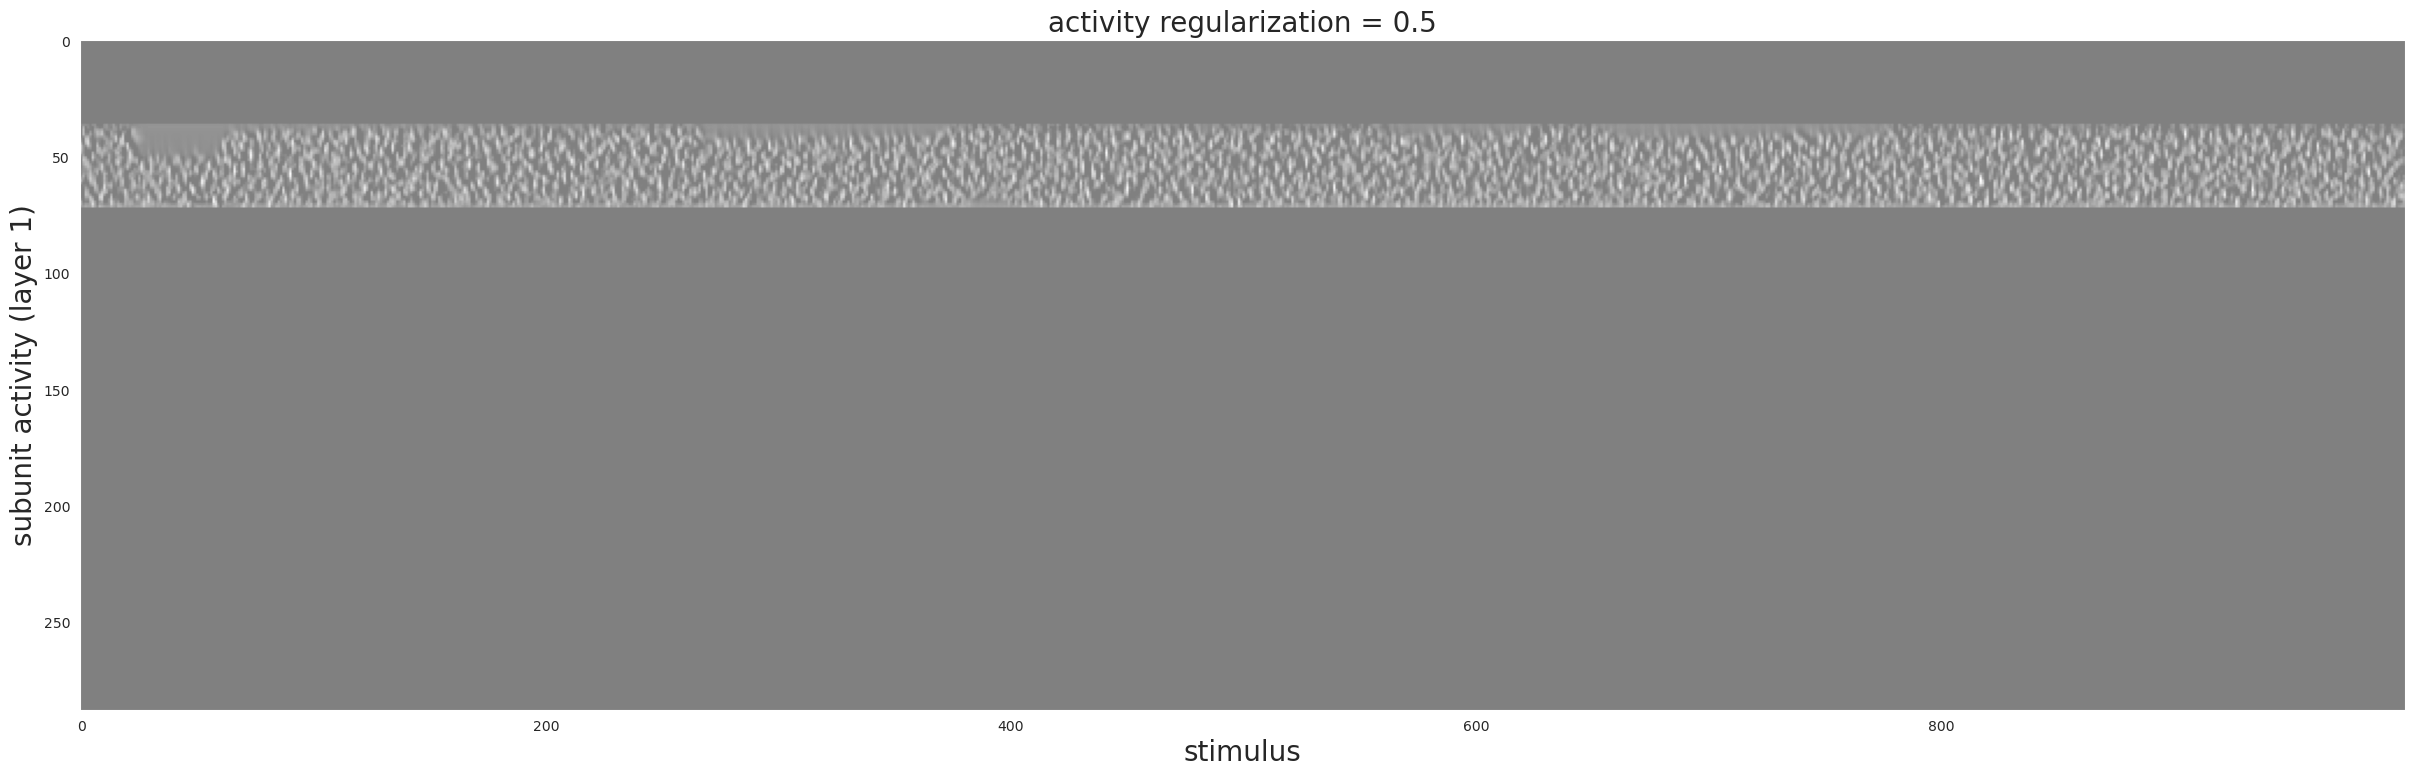

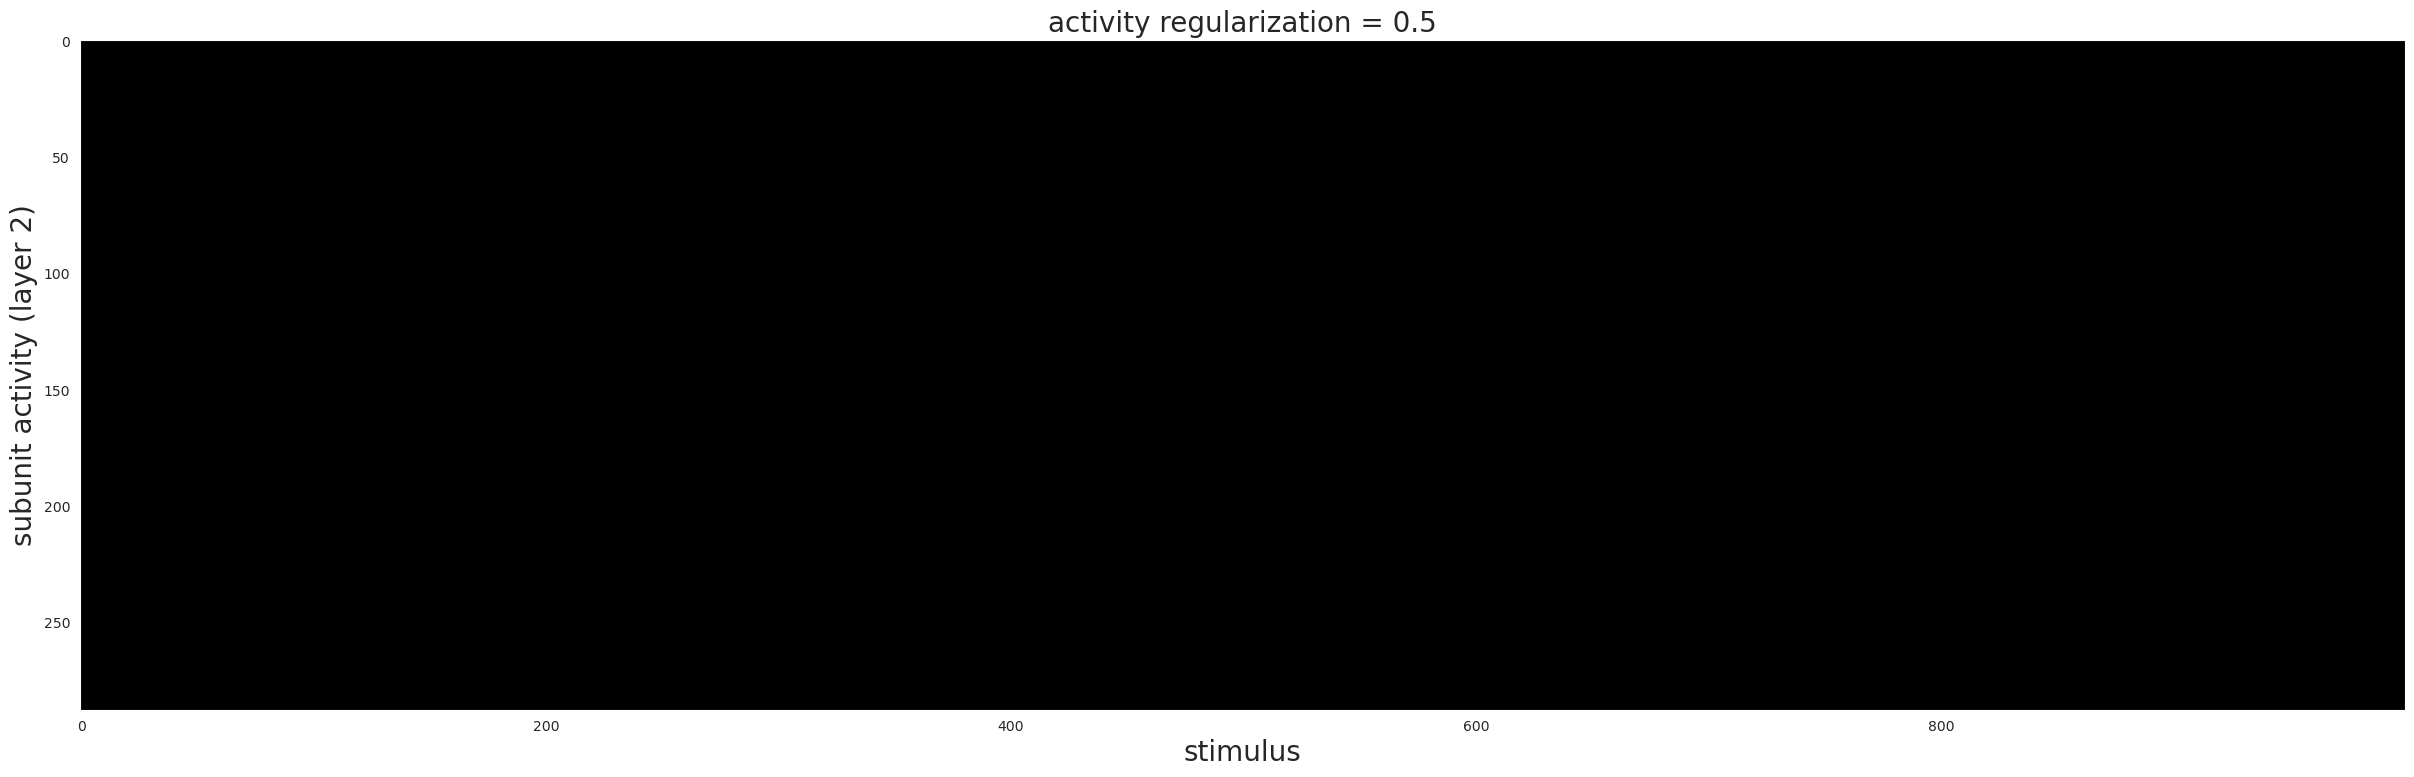

In [31]:
# only plot the first layer
for layer in range(3):
    fig = plt.figure(figsize=(30,20))
    plt.grid(False) # turn gridlines off
    im = np.array([np.squeeze(results_act05.outputs[i]['core'][layer]) for i in range(1000)])
    imax = np.max(im)
    imin = -imax
    plt.imshow(im.T, cmap='gray', vmin=imin, vmax=imax)
    plt.title('activity regularization = '+str(trial_act05.trial_params['activity']), fontsize=20)
    plt.xlabel('stimulus', fontsize=20)
    plt.ylabel('subunit activity (layer '+str(layer)+')', fontsize=20)
plt.show()

# activity=0.1

In [32]:
trial_act01 = e7.trials_where(activity=0.1)[0]
model_act01 = trial_act01.model
results_act01 = predict.predict(model_act01,
                                dataset=trial_act01.dataset[0:1000],
                                network_names_to_use=['core'])

lazy loading dataset
Loading ['expt04']
Loading expt04
  Time embedding...
  Done.
prev_output shape torch.Size([1000, 360]) ni 0 NetworkType.scaffold li 0
prev_output shape torch.Size([1000, 576]) ni 0 NetworkType.scaffold li 1
prev_output shape torch.Size([1000, 288]) ni 0 NetworkType.scaffold li 2


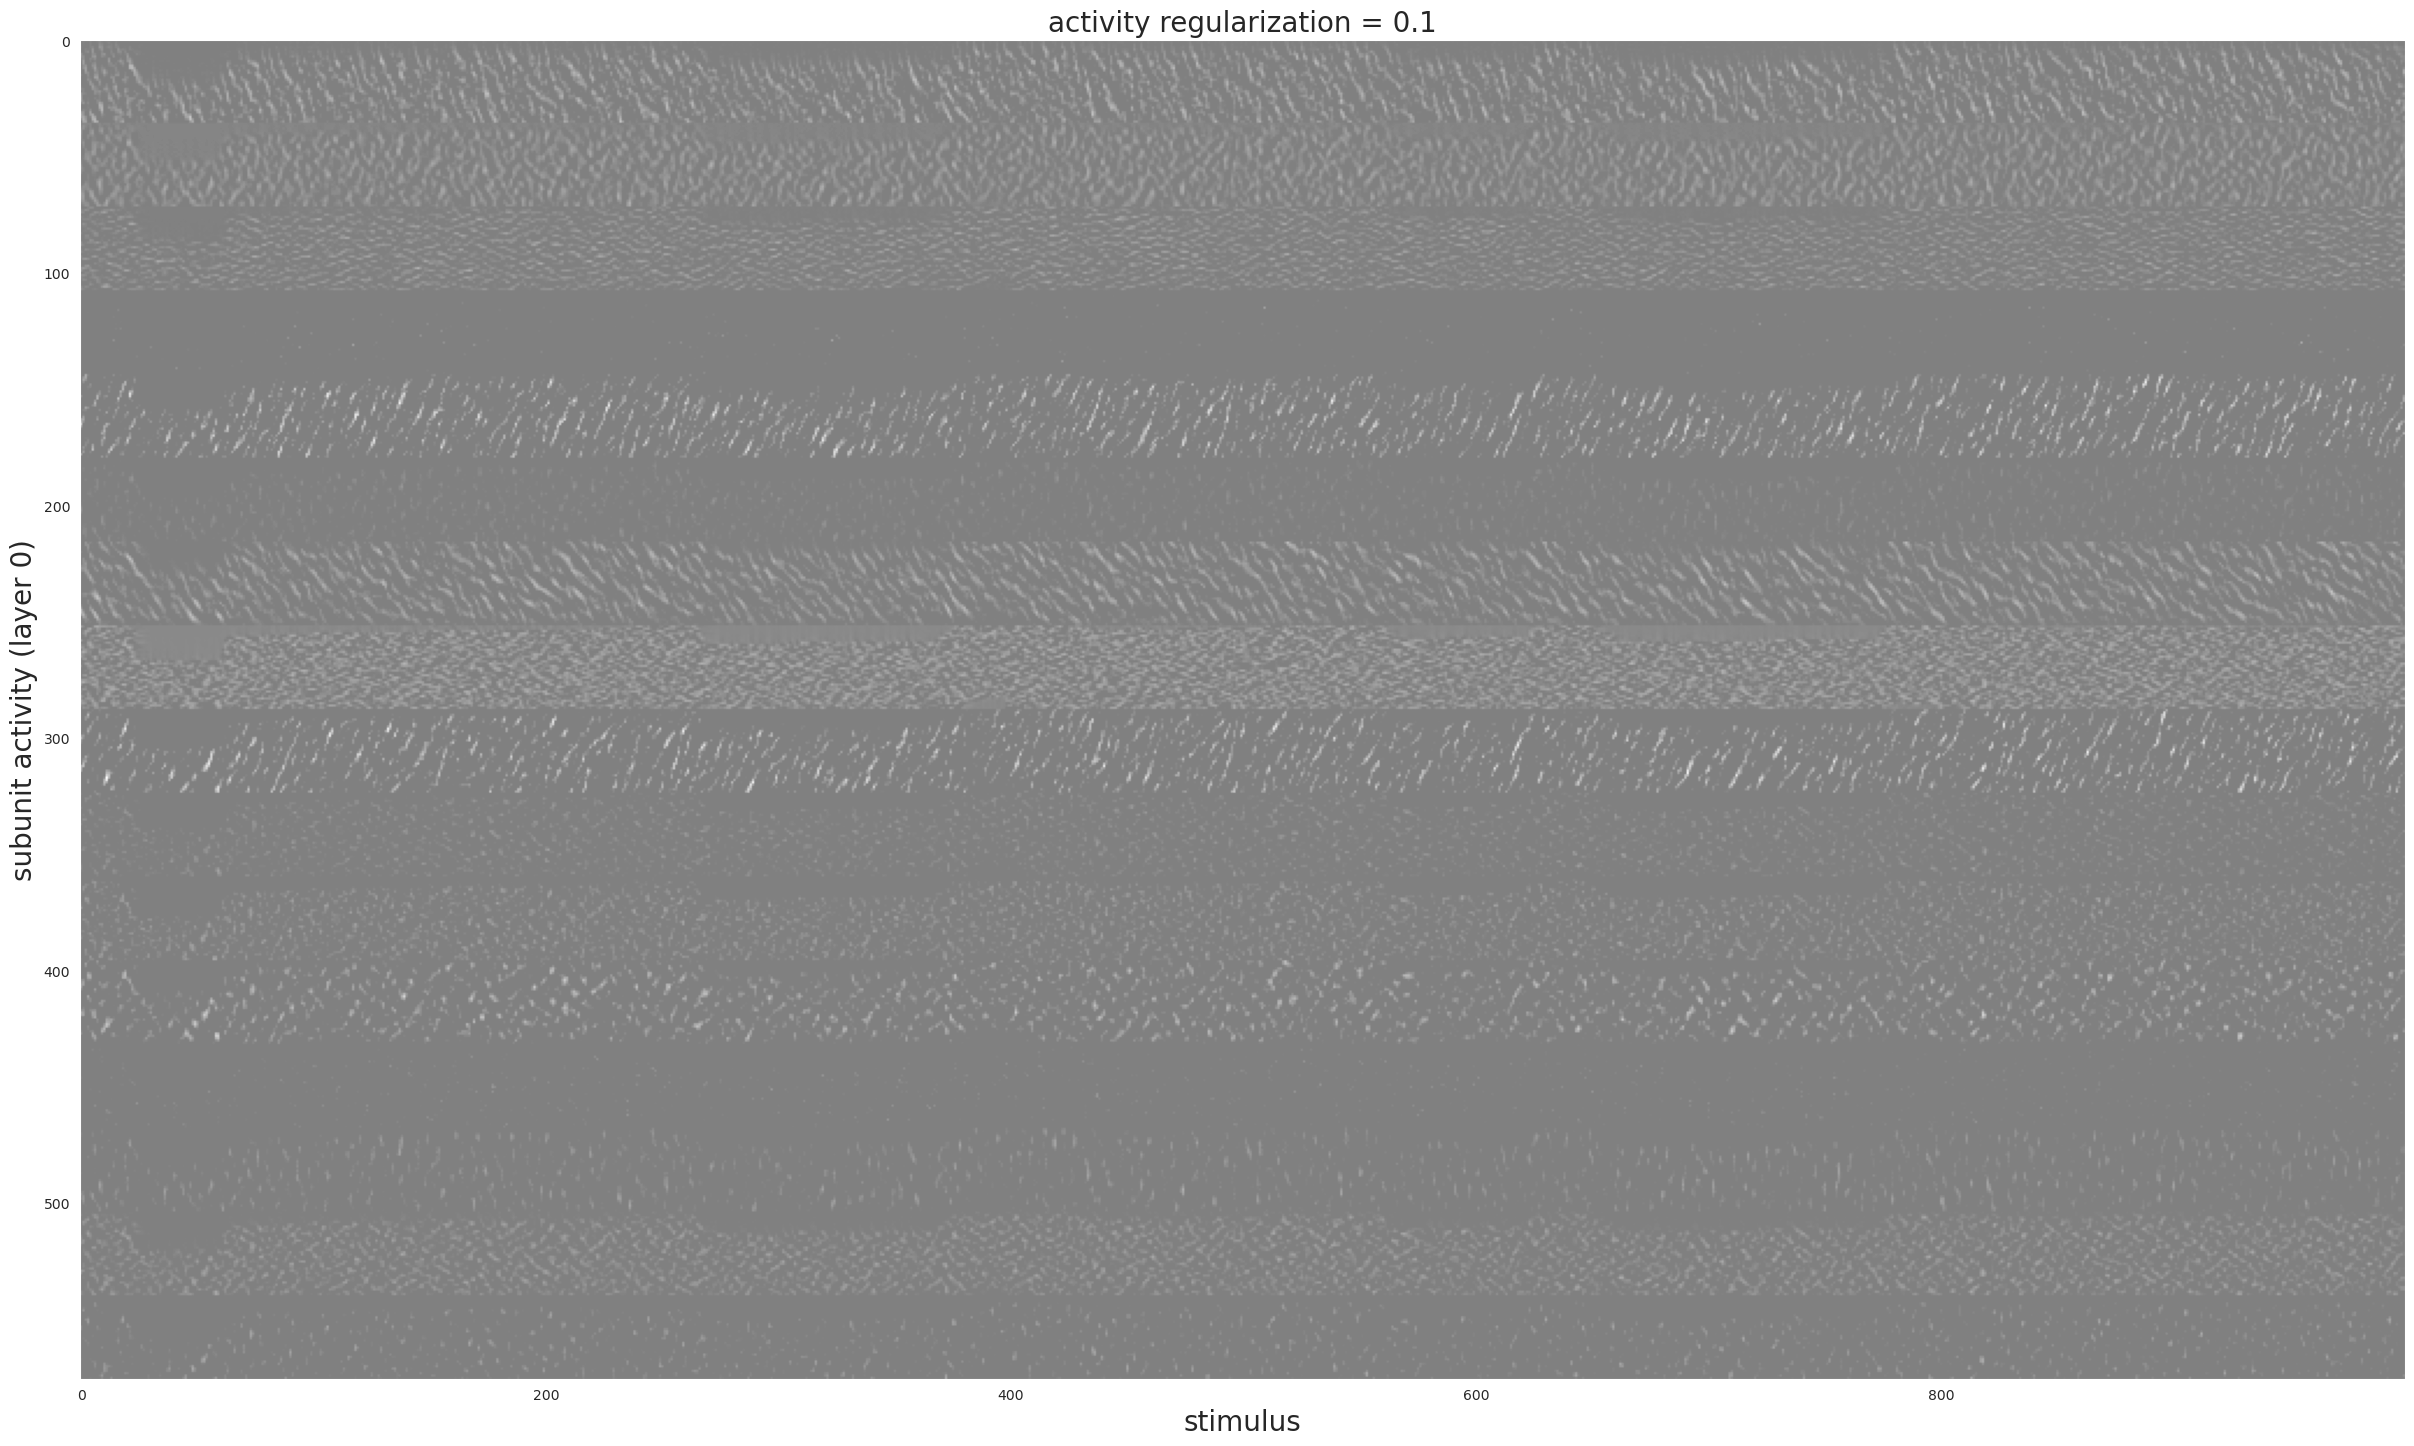

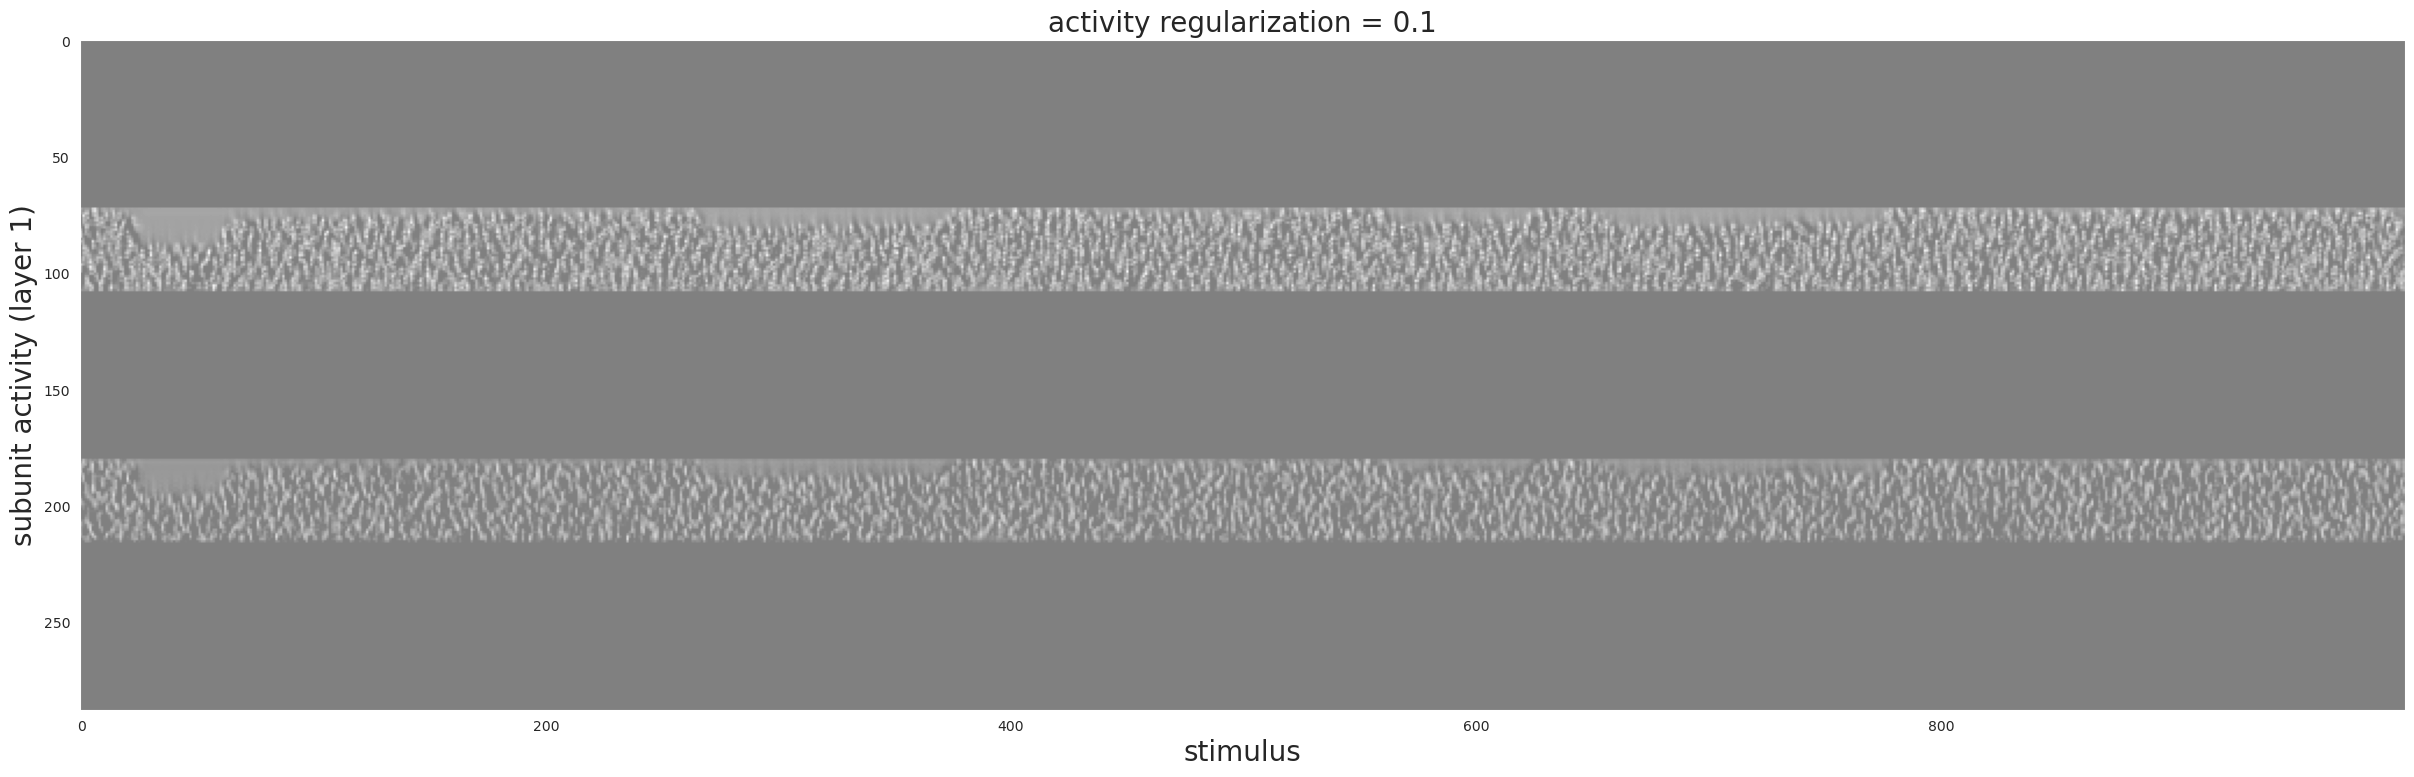

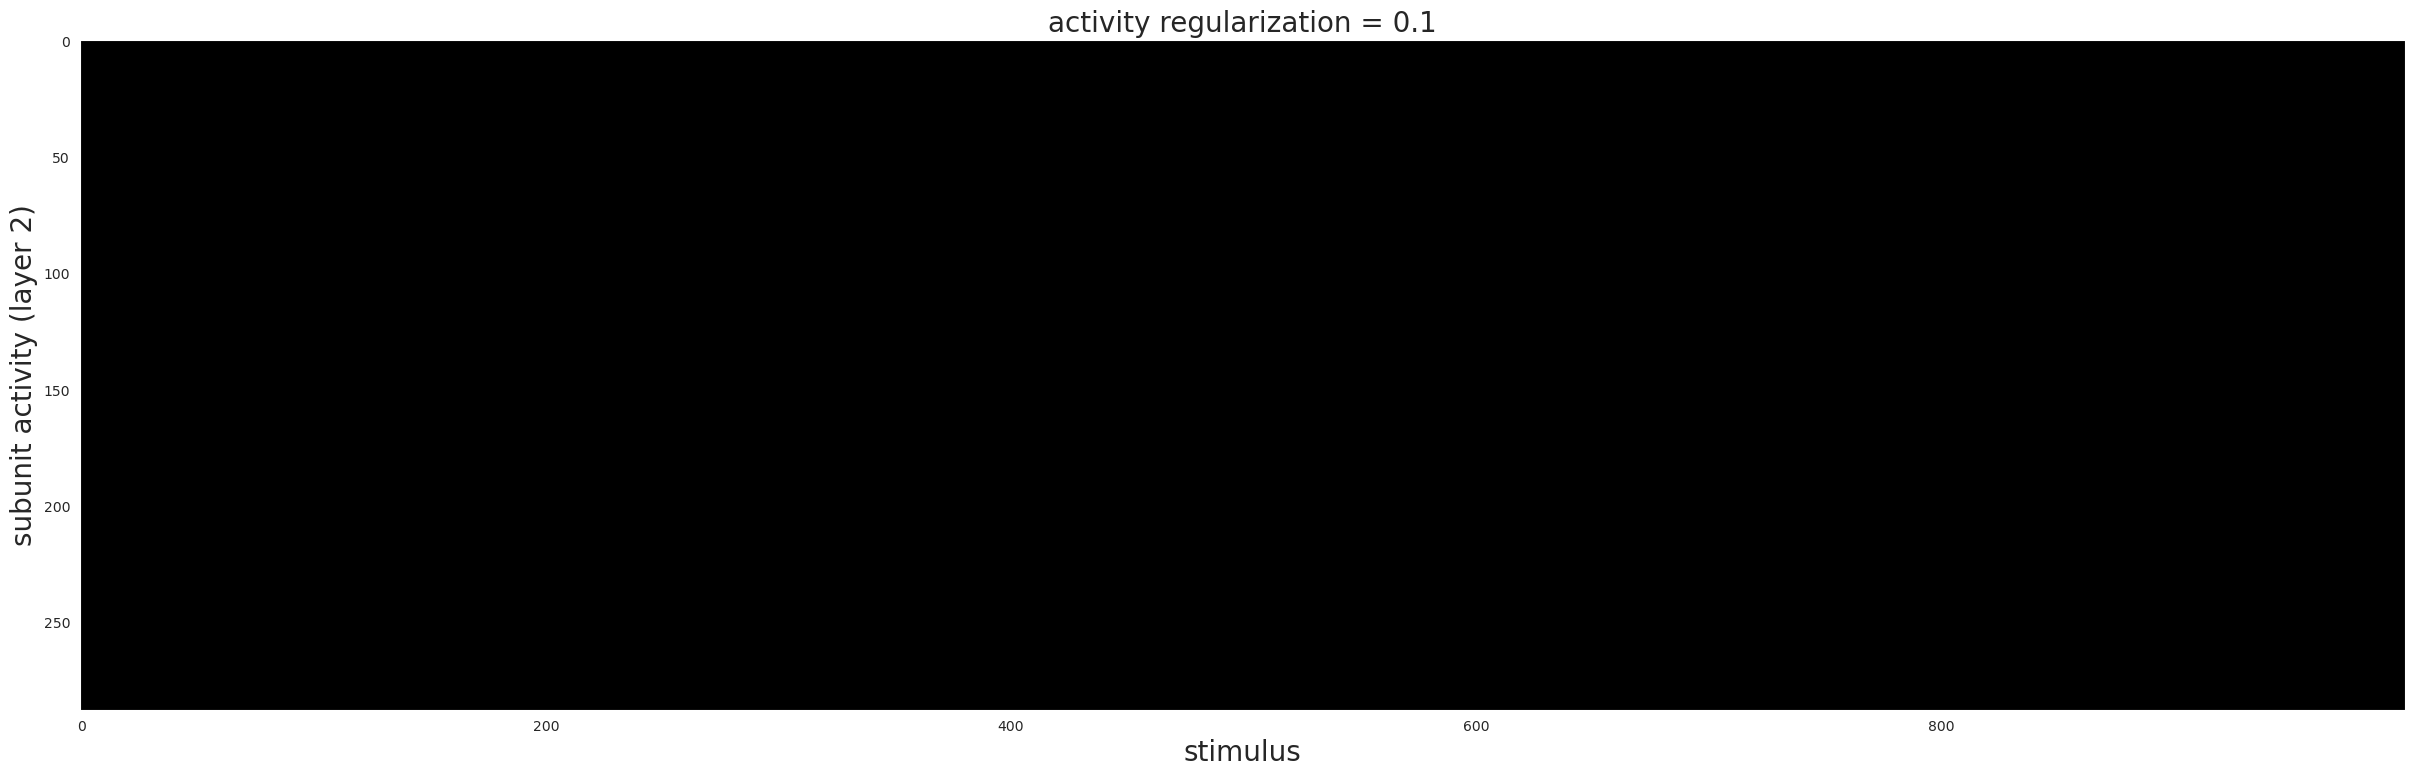

In [33]:
# only plot the first layer
for layer in range(3):
    fig = plt.figure(figsize=(30,20))
    plt.grid(False) # turn gridlines off
    im = np.array([np.squeeze(results_act01.outputs[i]['core'][layer]) for i in range(1000)])
    imax = np.max(im)
    imin = -imax
    plt.imshow(im.T, cmap='gray', vmin=imin, vmax=imax)
    plt.title('activity regularization = '+str(trial_act01.trial_params['activity']), fontsize=20)
    plt.xlabel('stimulus', fontsize=20)
    plt.ylabel('subunit activity (layer '+str(layer)+')', fontsize=20)
plt.show()

# activity+weight reg

In [121]:
# load experiment 9 (different activity reg values, with weight reg vals)
e9 = exp.load('reg_experiment_09', experiment_location='experiments', datadir='Mdata')
e9.trials

null_adjusted_LL num_filters  num_inh_percent    expt kernel_widths  \
0              True      16,8,8              0.0  expt04       21,11,5   
0              True      16,8,8              0.0  expt04       21,11,5   
0              True      16,8,8              0.0  expt04       21,11,5   
0              True      16,8,8              0.0  expt04       21,11,5   
0              True      16,8,8              0.0  expt04       21,11,5   
0              True      16,8,8              0.0  expt04       21,11,5   
0              True      16,8,8              0.0  expt04       21,11,5   
0              True      16,8,8              0.0  expt04       21,11,5   
0              True      16,8,8              0.0  expt04       21,11,5   
0              True      16,8,8              0.0  expt04       21,11,5   
0              True      16,8,8              0.0  expt04       21,11,5   
0              True      16,8,8              0.0  expt04       21,11,5   

  kernel_heights  copy_weights  freeze_weights  include_MUs  is_multiexp  \
0          3,3,3         False           False        False        False   
0          3,3,3         False           False        False        False   
0          3,3,3         False           False        False        False   
0          3,3,3         False           False        False        False   
0          3,3,3         False           False        False        False   
0          3,3,3         False           False        False        False   
0          3,3,3         False           False        False        False   
0          3,3,3         False           False        False        False   
0          3,3,3         False           False        False        False   
0          3,3,3         False           False        False        False   
0          3,3,3         False           False        False        False   
0          3,3,3         False           False        False        False   

   batch_size       modelstr  activity  d2xt      l1  center          bcs  \
0        6000  cnim_scaffold      2.00  0.01  0.0001    0.01  {'d2xt': 1}   
0        6000  cnim_scaffold      1.00  0.01  0.0001    0.01  {'d2xt': 1}   
0        6000  cnim_scaffold      0.10  0.01  0.0001    0.01  {'d2xt': 1}   
0        6000  cnim_scaffold      0.01  0.01  0.0001    0.01  {'d2xt': 1}   
0        6000  cnim_scaffold      0.90  0.01  0.0001    0.01  {'d2xt': 1}   
0        6000  cnim_scaffold      0.80  0.01  0.0001    0.01  {'d2xt': 1}   
0        6000  cnim_scaffold      0.70  0.01  0.0001    0.01  {'d2xt': 1}   
0        6000  cnim_scaffold      0.60  0.01  0.0001    0.01  {'d2xt': 1}   
0        6000  cnim_scaffold      0.50  0.01  0.0001    0.01  {'d2xt': 1}   
0        6000  cnim_scaffold      0.40  0.01  0.0001    0.01  {'d2xt': 1}   
0        6000  cnim_scaffold      0.30  0.01  0.0001    0.01  {'d2xt': 1}   
0        6000  cnim_scaffold      0.20  0.01  0.0001    0.01  {'d2xt': 1}   

              name                                        trial  mean_LLs  
0   cnim_scaffold0  <experiment.Trial object at 0x7f5134c530d0>  0.298868  
0   cnim_scaffold1  <experiment.Trial object at 0x7f5134cc8af0>  0.271710  
0  cnim_scaffold10  <experiment.Trial object at 0x7f5134c46a00>  0.406098  
0  cnim_scaffold11  <experiment.Trial object at 0x7f5134aa1dc0>  0.450447  
0   cnim_scaffold2  <experiment.Trial object at 0x7f5134bcbdc0>  0.371702  
0   cnim_scaffold3  <experiment.Trial object at 0x7f5134bac910>  0.390506  
0   cnim_scaffold4  <experiment.Trial object at 0x7f5134aa16a0>  0.368587  
0   cnim_scaffold5  <experiment.Trial object at 0x7f5134ce4760>  0.290272  
0   cnim_scaffold6  <experiment.Trial object at 0x7f5134c64b80>  0.363912  
0   cnim_scaffold7  <experiment.Trial object at 0x7f5134cb3a00>  0.382041  
0   cnim_scaffold8  <experiment.Trial object at 0x7f5134c53700>  0.331532  
0   cnim_scaffold9  <experiment.Trial object at 0x7f5134c53fd0>  0.362379

In [140]:
frame_length = 50000
trial = e9.trials_where(activity=1.0)[0]
model = trial.model
results = predict.predict(model,
                                dataset=trial.dataset[0:frame_length],
                                network_names_to_use=['core'],
                                calc_jacobian=False)
# # only plot the first layer
# for layer in range(3):
#     fig = plt.figure(figsize=(30,20))
#     plt.grid(False) # turn gridlines off
#     im = np.array([np.squeeze(results.outputs[i]['core'][layer]) for i in range(frame_length)])
#     # put a line at the end of im
#     im_len = im.shape[1]
#     im = im.reshape(5000, im_len*10)
#     imax = np.max(im)
#     imin = -imax
#     plt.imshow(im.T, cmap='gray', vmin=imin, vmax=imax)
#     # draw a horizontal red line at each im.shape[1] frame
#     for i in range(10):
#         plt.axhline(y=im_len*i, color='r', linewidth=1)
#     plt.title('activity regularization = '+str(trial.trial_params['activity']), fontsize=20)
#     plt.xlabel('stimulus', fontsize=20)
#     plt.ylabel('subunit activity (layer '+str(layer)+')', fontsize=20)
# plt.show()

lazy loading dataset
Loading ['expt04']
Loading expt04
  Time embedding...
  Done.
prev_output shape torch.Size([50000, 360]) ni 0 NetworkType.scaffold li 0
prev_output shape torch.Size([50000, 576]) ni 0 NetworkType.scaffold li 1
prev_output shape torch.Size([50000, 288]) ni 0 NetworkType.scaffold li 2


# subunit activations per neuron

In [141]:
# get the weights going from layer 1 to the readout layer for a particular neuron
readout = model.networks_by_name['readout'].layers[0].weights.reshape(1152, 11)

weighted_activities = np.zeros((frame_length, 11, 1152))
for frame in range(frame_length):
    activity = np.squeeze(np.concatenate([results.outputs[frame]['core'][i] for i in range(3)], axis=1))
    # reweight the activations by the weights by element-wise multiplication
    for neuron in range(11):
        weighted_activity = activity * readout[:, neuron]
        weighted_activities[frame, neuron, :] = weighted_activity

# correlation between the reweighted neuron activities

[[1.00000000e+00 3.29949269e-03 3.31126448e-04 1.37985466e-02
  1.81645734e-04 1.81976855e-03 1.96196216e-03 1.66323989e-04
  1.37368930e-02 3.35729906e-04 3.28568383e-03]
 [3.29949269e-03 1.00000000e+00 3.22752327e-03 3.28764162e-04
  1.42870001e-02 1.48224874e-04 1.93609262e-03 1.83353445e-03
  1.46017943e-04 1.40694494e-02 3.35802361e-04]
 [3.31126448e-04 3.22752327e-03 1.00000000e+00 3.21123351e-03
  3.28706788e-04 1.40788067e-02 1.73945188e-04 1.86023224e-03
  1.82094408e-03 1.80102985e-04 1.39507855e-02]
 [1.37985466e-02 3.28764162e-04 3.21123351e-03 1.00000000e+00
  3.22240920e-03 3.23143044e-04 1.44089883e-02 1.72375959e-04
  1.81207260e-03 1.93091454e-03 1.46987304e-04]
 [1.81645734e-04 1.42870001e-02 3.28706788e-04 3.22240920e-03
  1.00000000e+00 3.25711696e-03 3.08845687e-04 1.40818176e-02
  1.72307449e-04 1.79992432e-03 1.87801603e-03]
 [1.81976855e-03 1.48224874e-04 1.40788067e-02 3.23143044e-04
  3.25711696e-03 1.00000000e+00 3.25225102e-03 3.57251905e-04
  1.37791188e-02

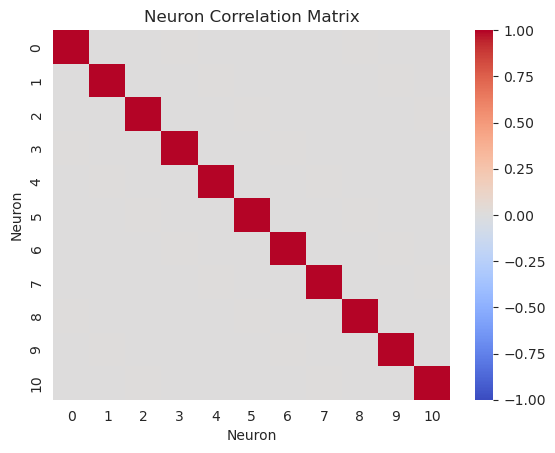

In [142]:
weighted_activities_flattened = weighted_activities.reshape(11, 50000 * 1152)
correlation_matrix = np.corrcoef(weighted_activities_flattened)
print(correlation_matrix)
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Neuron Correlation Matrix")
plt.xlabel("Neuron")
plt.ylabel("Neuron")
plt.show()

# umap to cluster the activity

In [143]:
# reshape weighted activities to be 2D (across neurons)
weighted_activities_2D = weighted_activities.reshape(50000 * 11, 1152)

import umap
reducer = umap.UMAP()
embedding = reducer.fit_transform(weighted_activities_2D)
embedding.shape

KeyboardInterrupt: 

In [ ]:
# plot the embeddings, color by neuron
fig = plt.figure(figsize=(40,20))
plt.scatter(embedding[:, 0], embedding[:, 1], c=np.tile(np.arange(11), 50000), cmap='Spectral', s=0.1)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the weighted subunit activities (activity_reg = 1.0 + weight_reg)', fontsize=24)
# plot the colorbar
cbar = plt.colorbar(boundaries=np.arange(11))
plt.show()

In [0]:
# import os
# 
# # get the subunit activations for neuron 1
# # get the activity for layer 0
# 
# # get the weights going from layer 1 to the readout layer for a particular neuron
# readout = model.networks_by_name['readout'].layers[0].weights.reshape(1152, 11)
# 
# #os.mkdir('subunit_activations')
# for frame in range(1000):
#     activity = np.squeeze(np.concatenate([results.outputs[frame]['core'][i] for i in range(3)], axis=1))
#     # reweight the activations by the weights by element-wise multiplication
#     # plot the weighted activity for each neuron in 11 subplots
#     fig = plt.figure(figsize=(30,55))
#     # title for the plot
#     plt.suptitle('subunit activations (activity=1.0) for frame '+str(frame), fontsize=20)
#     for neuron in range(11):
#         ax = plt.subplot(11,1,neuron+1)
#         ax.plot(activity, label='activity', alpha=0.1, c='k')
#         weighted_activity = activity * readout[:, neuron]
#         # plot the weighted activity
#         ax.plot(weighted_activity, label='weighted')
#         ax.set_xlabel('layer weights', fontsize=12)
#         ax.set_ylabel('activity', fontsize=12)
#         ax.set_title('neuron '+str(neuron), fontsize=12)
#         ax.legend(fontsize=12)
#     plt.savefig('subunit_activations/subunit_activations_'+str(frame)+'.png')
#     plt.close()
#     #plt.show()
# 
# # TODO: compare this across stimuli
# # TODO: compare this across activity regularization values